In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import KFold
from warnings import filterwarnings
filterwarnings('ignore')


In [2]:
# 1-1. load data
file_path = r"C:\Users\tempuser\OneDrive - postech.ac.kr\2025\7. KAMP 경진대회\2025_KAMP_anomaly_detection\data\2. 소성가공 품질보증 AI 데이터셋.csv"
df = pd.read_csv(file_path)
df

,date,EX5.MELT_TEMP,EX4.MELT_TEMP,EX3.MELT_TEMP,EX2.MELT_TEMP,EX1.Z1_PV,EX1.Z2_PV,EX1.Z3_PV,EX1.Z4_PV,EX1.A1_PV,EX1.A2_PV,EX1.H1_PV,EX1.H2_PV,EX1.H3_PV,EX1.H4_PV,EX1.H2O_PV,EX1.MELT_P_PV,EX1.MD_PV,EX1.MD_TQ,passorfail
0,2020 10 30 00:00:04,297,222,251,267,209,219,229,239,240,239,241,240,240,40,41,0.0000,71.2215,72,0.0
1,2020 10 30 00:00:09,297,222,251,268,210,219,229,239,240,239,240,240,240,40,41,0.0000,71.2096,72,0.0
2,2020 10 30 00:00:14,297,222,251,267,210,219,229,239,240,239,240,240,240,40,41,0.0000,71.1977,72,0.0
3,2020 10 30 00:00:19,297,222,251,267,210,219,229,240,240,239,241,240,240,40,41,0.0000,71.1977,72,0.0
4,2020 10 30 00:00:24,297,222,251,267,210,219,229,239,240,239,241,240,240,40,41,0.0000,71.1977,72,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17275,2020 10 30 23:59:39,296,222,252,267,215,220,230,240,240,240,240,240,240,40,42,2.8000,71.2096,72,NaN
17276,2020 10 30 23:59:44,296,222,252,267,215,220,230,240,240,240,240,240,240,40,42,2.8438,71.2096,72,NaN
17277,2020 10 30 23:59:49,296,222,252,267,214,220,230,240,240,240,240,240,240,40,42,2.8875,71.1858,72,NaN
17278,2020 10 30 23:59:54,296,222,252,267,214,220,230,240,240,240,240,240,240,40,42,2.8875,71.2096,72,NaN


In [3]:
# 1-2. Explore data
df1 = df.copy()
df1

,date,EX5.MELT_TEMP,EX4.MELT_TEMP,EX3.MELT_TEMP,EX2.MELT_TEMP,EX1.Z1_PV,EX1.Z2_PV,EX1.Z3_PV,EX1.Z4_PV,EX1.A1_PV,EX1.A2_PV,EX1.H1_PV,EX1.H2_PV,EX1.H3_PV,EX1.H4_PV,EX1.H2O_PV,EX1.MELT_P_PV,EX1.MD_PV,EX1.MD_TQ,passorfail
0,2020 10 30 00:00:04,297,222,251,267,209,219,229,239,240,239,241,240,240,40,41,0.0000,71.2215,72,0.0
1,2020 10 30 00:00:09,297,222,251,268,210,219,229,239,240,239,240,240,240,40,41,0.0000,71.2096,72,0.0
2,2020 10 30 00:00:14,297,222,251,267,210,219,229,239,240,239,240,240,240,40,41,0.0000,71.1977,72,0.0
3,2020 10 30 00:00:19,297,222,251,267,210,219,229,240,240,239,241,240,240,40,41,0.0000,71.1977,72,0.0
4,2020 10 30 00:00:24,297,222,251,267,210,219,229,239,240,239,241,240,240,40,41,0.0000,71.1977,72,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17275,2020 10 30 23:59:39,296,222,252,267,215,220,230,240,240,240,240,240,240,40,42,2.8000,71.2096,72,NaN
17276,2020 10 30 23:59:44,296,222,252,267,215,220,230,240,240,240,240,240,240,40,42,2.8438,71.2096,72,NaN
17277,2020 10 30 23:59:49,296,222,252,267,214,220,230,240,240,240,240,240,240,40,42,2.8875,71.1858,72,NaN
17278,2020 10 30 23:59:54,296,222,252,267,214,220,230,240,240,240,240,240,240,40,42,2.8875,71.2096,72,NaN


In [4]:
df1.columns

# 칼럼별 데이터 타입 확인
for col in df1.columns:
    data_type = df1[f'{col}'].dtype
    print(f'{col}: {data_type}')

# 행, 열 개수 확인
df1.shape

# 수치형 변수의 분포 확인
df1.describe().transpose()


date: object
EX5.MELT_TEMP: int64
EX4.MELT_TEMP: int64
EX3.MELT_TEMP: int64
EX2.MELT_TEMP: int64
EX1.Z1_PV: int64
EX1.Z2_PV: int64
EX1.Z3_PV: int64
EX1.Z4_PV: int64
EX1.A1_PV: int64
EX1.A2_PV: int64
EX1.H1_PV: int64
EX1.H2_PV: int64
EX1.H3_PV: int64
EX1.H4_PV: int64
EX1.H2O_PV: int64
EX1.MELT_P_PV: float64
EX1.MD_PV: float64
EX1.MD_TQ: int64
passorfail: float64


,count,mean,std,min,25%,50%,75%,max
EX5.MELT_TEMP,17280.0,296.390336,0.588004,294.0,296.0000,296.0000,297.0000,300.0000
EX4.MELT_TEMP,17280.0,221.892245,0.369363,219.0,222.0000,222.0000,222.0000,223.0000
EX3.MELT_TEMP,17280.0,251.021470,0.637443,249.0,251.0000,251.0000,251.0000,253.0000
EX2.MELT_TEMP,17280.0,266.929340,0.577904,265.0,267.0000,267.0000,267.0000,269.0000
EX1.Z1_PV,17280.0,209.786516,1.628204,201.0,209.0000,210.0000,210.0000,218.0000
EX1.Z2_PV,17280.0,219.619387,0.496280,217.0,219.0000,220.0000,220.0000,221.0000
EX1.Z3_PV,17280.0,229.677951,0.473549,228.0,229.0000,230.0000,230.0000,232.0000
EX1.Z4_PV,17280.0,239.676273,0.477824,237.0,239.0000,240.0000,240.0000,242.0000
EX1.A1_PV,17280.0,239.576100,0.501628,239.0,239.0000,240.0000,240.0000,241.0000
EX1.A2_PV,17280.0,239.572106,0.586524,237.0,239.0000,240.0000,240.0000,242.0000


In [5]:
# 결측치 개수 파악
df1.isnull().sum()

date              0
EX5.MELT_TEMP     0
EX4.MELT_TEMP     0
EX3.MELT_TEMP     0
EX2.MELT_TEMP     0
EX1.Z1_PV         0
EX1.Z2_PV         0
EX1.Z3_PV         0
EX1.Z4_PV         0
EX1.A1_PV         0
EX1.A2_PV         0
EX1.H1_PV         0
EX1.H2_PV         0
EX1.H3_PV         0
EX1.H4_PV         0
EX1.H2O_PV        0
EX1.MELT_P_PV     0
EX1.MD_PV         0
EX1.MD_TQ         0
passorfail       16
dtype: int64

In [6]:
# 각 컬럼별 데이터 수, 데이터 타입 확인
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17280 entries, 0 to 17279
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           17280 non-null  object 
 1   EX5.MELT_TEMP  17280 non-null  int64  
 2   EX4.MELT_TEMP  17280 non-null  int64  
 3   EX3.MELT_TEMP  17280 non-null  int64  
 4   EX2.MELT_TEMP  17280 non-null  int64  
 5   EX1.Z1_PV      17280 non-null  int64  
 6   EX1.Z2_PV      17280 non-null  int64  
 7   EX1.Z3_PV      17280 non-null  int64  
 8   EX1.Z4_PV      17280 non-null  int64  
 9   EX1.A1_PV      17280 non-null  int64  
 10  EX1.A2_PV      17280 non-null  int64  
 11  EX1.H1_PV      17280 non-null  int64  
 12  EX1.H2_PV      17280 non-null  int64  
 13  EX1.H3_PV      17280 non-null  int64  
 14  EX1.H4_PV      17280 non-null  int64  
 15  EX1.H2O_PV     17280 non-null  int64  
 16  EX1.MELT_P_PV  17280 non-null  float64
 17  EX1.MD_PV      17280 non-null  float64
 18  EX1.MD

In [7]:
# 양품, 불량 수 확인
frauds = df1[df1.passorfail == 1].shape[0]
normal = df1[df1.passorfail == 0].shape[0]
fraud_rate = frauds/(frauds+normal)*100
print(f'양품 수: {normal} 불량 수: {frauds}\n불량률: {fraud_rate}')

양품 수: 17154 불량 수: 110
불량률: 0.6371640407784986


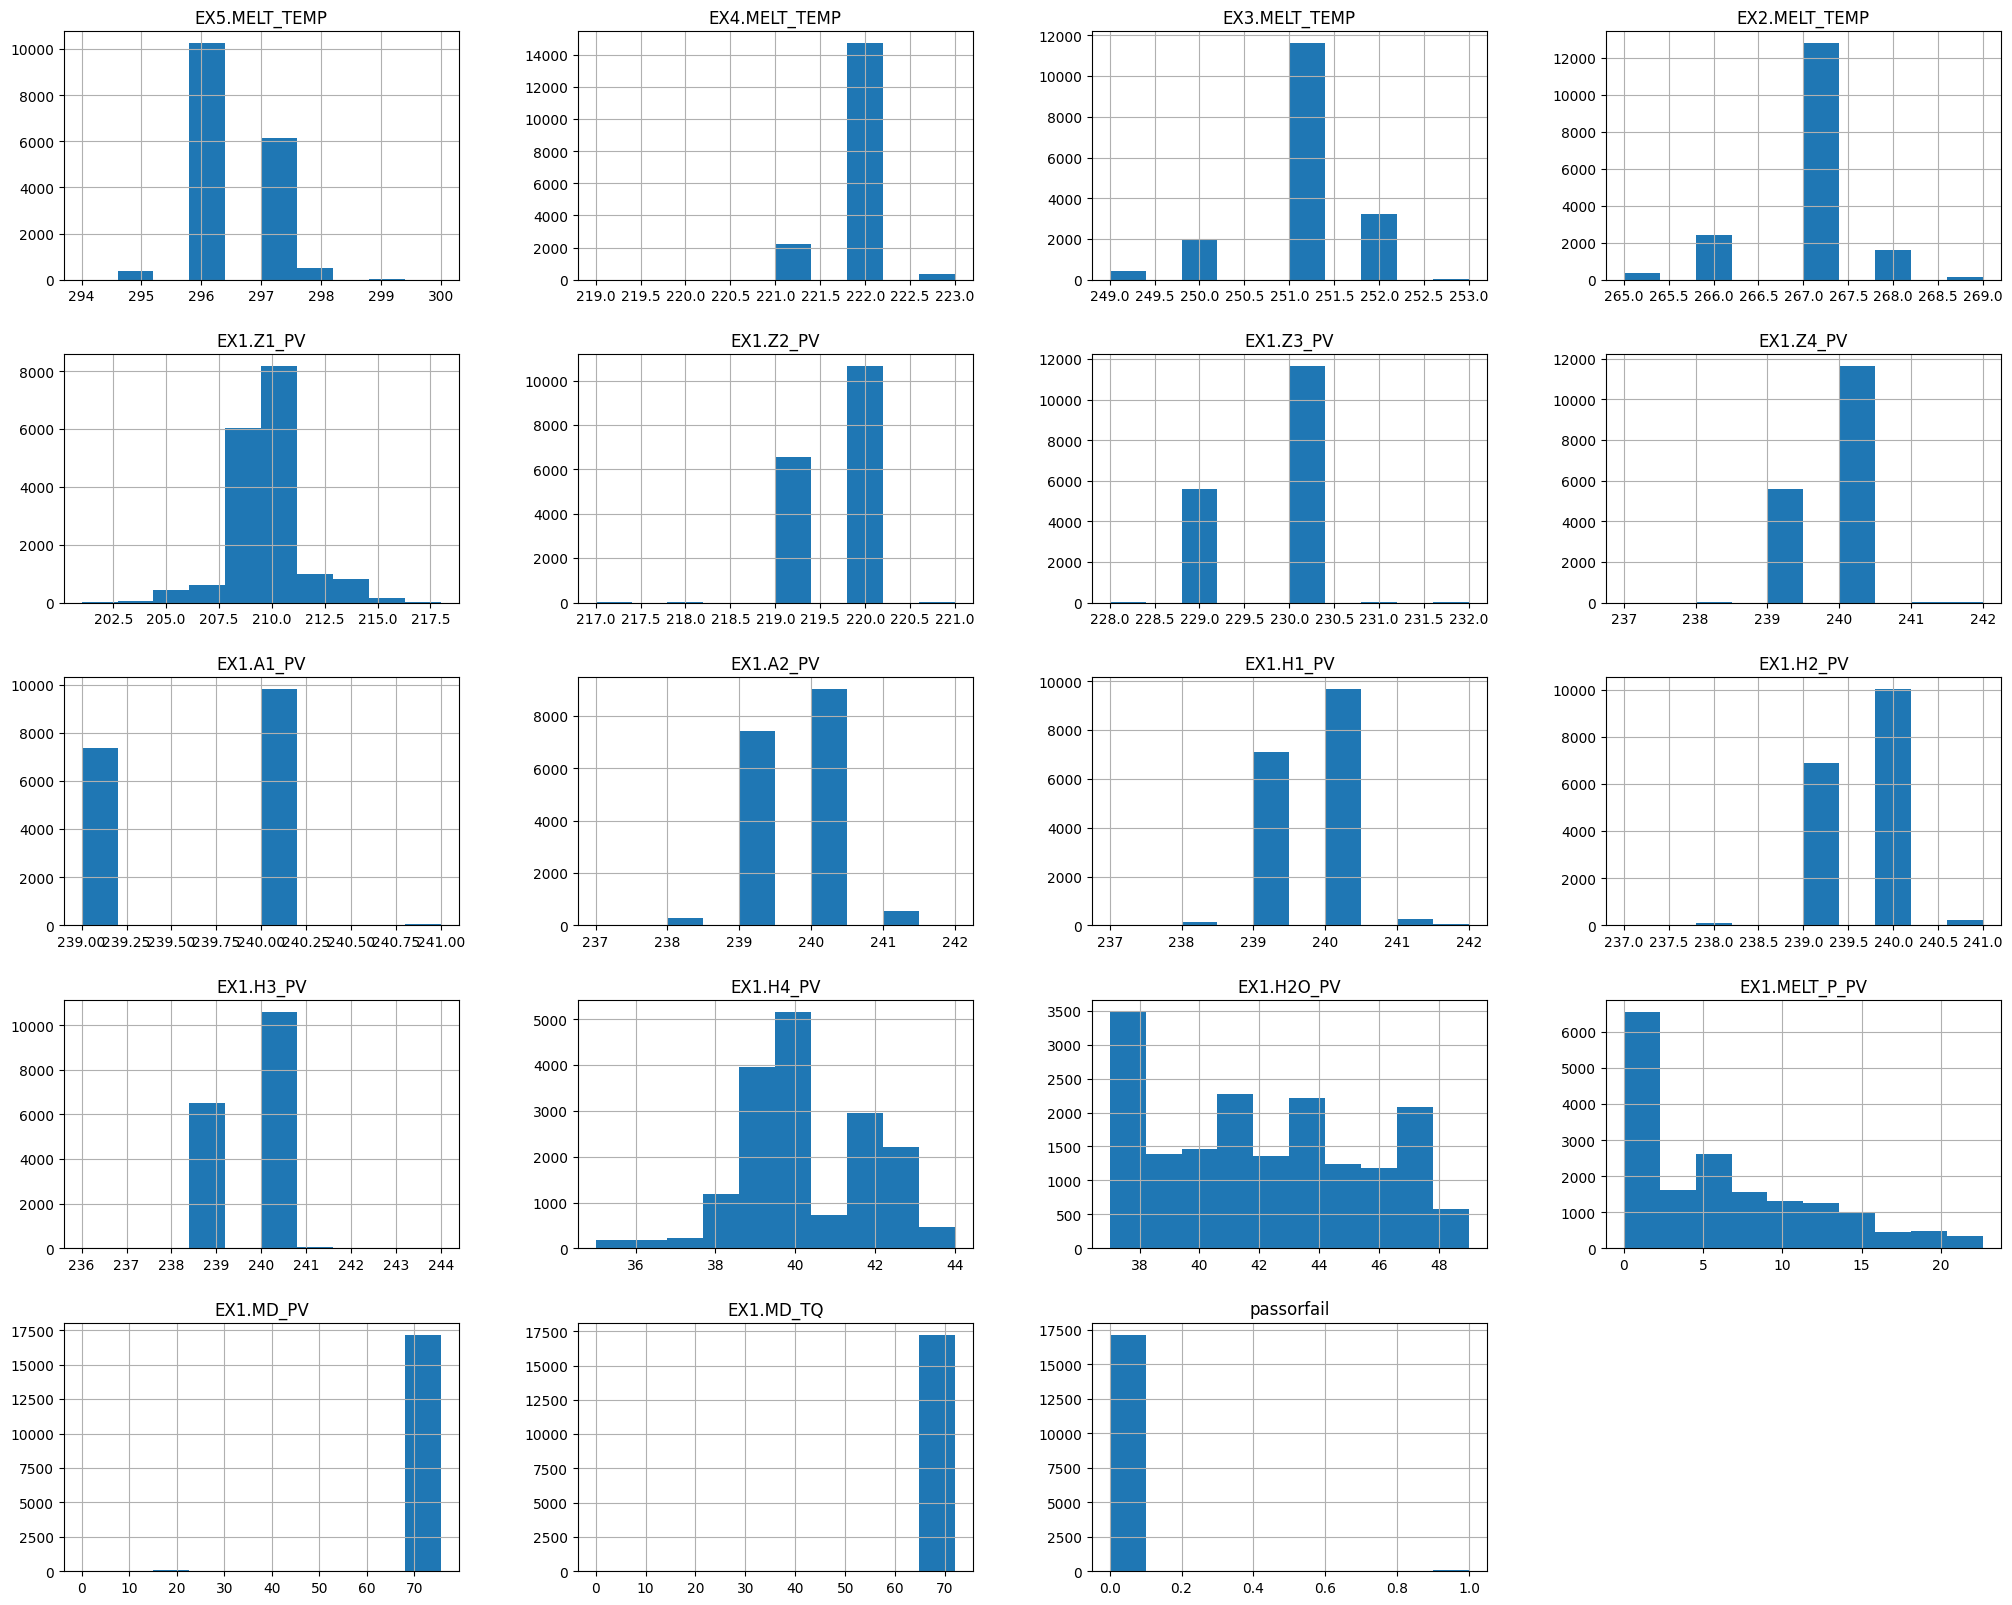

In [8]:
# 변수 분포 시각화
df1.hist(figsize=(25,20))
plt.show()

In [9]:
df

,date,EX5.MELT_TEMP,EX4.MELT_TEMP,EX3.MELT_TEMP,EX2.MELT_TEMP,EX1.Z1_PV,EX1.Z2_PV,EX1.Z3_PV,EX1.Z4_PV,EX1.A1_PV,EX1.A2_PV,EX1.H1_PV,EX1.H2_PV,EX1.H3_PV,EX1.H4_PV,EX1.H2O_PV,EX1.MELT_P_PV,EX1.MD_PV,EX1.MD_TQ,passorfail
0,2020 10 30 00:00:04,297,222,251,267,209,219,229,239,240,239,241,240,240,40,41,0.0000,71.2215,72,0.0
1,2020 10 30 00:00:09,297,222,251,268,210,219,229,239,240,239,240,240,240,40,41,0.0000,71.2096,72,0.0
2,2020 10 30 00:00:14,297,222,251,267,210,219,229,239,240,239,240,240,240,40,41,0.0000,71.1977,72,0.0
3,2020 10 30 00:00:19,297,222,251,267,210,219,229,240,240,239,241,240,240,40,41,0.0000,71.1977,72,0.0
4,2020 10 30 00:00:24,297,222,251,267,210,219,229,239,240,239,241,240,240,40,41,0.0000,71.1977,72,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17275,2020 10 30 23:59:39,296,222,252,267,215,220,230,240,240,240,240,240,240,40,42,2.8000,71.2096,72,NaN
17276,2020 10 30 23:59:44,296,222,252,267,215,220,230,240,240,240,240,240,240,40,42,2.8438,71.2096,72,NaN
17277,2020 10 30 23:59:49,296,222,252,267,214,220,230,240,240,240,240,240,240,40,42,2.8875,71.1858,72,NaN
17278,2020 10 30 23:59:54,296,222,252,267,214,220,230,240,240,240,240,240,240,40,42,2.8875,71.2096,72,NaN


In [15]:
# 2. Preprocess

# EX5.MELT_TEMP ~ EX1.MD_TQ -> X값
# passorfail -> y값
drop_cols = ['date', 'EX1.MELT_P_PV', 'EX1.MD_PV', 'EX1.MD_TQ']
cols = [c for c in df.columns if c not in drop_cols]
df2 = df1.loc[:,cols]
df2 = df2.astype(float)
df2 = df2.astype({'passorfail':'float32'})

# 결측치 제거
df2 = df2.dropna()
df2

,EX5.MELT_TEMP,EX4.MELT_TEMP,EX3.MELT_TEMP,EX2.MELT_TEMP,EX1.Z1_PV,EX1.Z2_PV,EX1.Z3_PV,EX1.Z4_PV,EX1.A1_PV,EX1.A2_PV,EX1.H1_PV,EX1.H2_PV,EX1.H3_PV,EX1.H4_PV,EX1.H2O_PV,passorfail
0,297.0,222.0,251.0,267.0,209.0,219.0,229.0,239.0,240.0,239.0,241.0,240.0,240.0,40.0,41.0,0.0
1,297.0,222.0,251.0,268.0,210.0,219.0,229.0,239.0,240.0,239.0,240.0,240.0,240.0,40.0,41.0,0.0
2,297.0,222.0,251.0,267.0,210.0,219.0,229.0,239.0,240.0,239.0,240.0,240.0,240.0,40.0,41.0,0.0
3,297.0,222.0,251.0,267.0,210.0,219.0,229.0,240.0,240.0,239.0,241.0,240.0,240.0,40.0,41.0,0.0
4,297.0,222.0,251.0,267.0,210.0,219.0,229.0,239.0,240.0,239.0,241.0,240.0,240.0,40.0,41.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17259,296.0,222.0,252.0,267.0,211.0,219.0,229.0,240.0,240.0,240.0,239.0,239.0,240.0,40.0,42.0,0.0
17260,296.0,222.0,252.0,267.0,211.0,219.0,230.0,240.0,240.0,240.0,239.0,240.0,240.0,40.0,42.0,0.0
17261,296.0,222.0,252.0,267.0,212.0,219.0,230.0,240.0,240.0,240.0,239.0,239.0,240.0,40.0,42.0,0.0
17262,296.0,222.0,252.0,267.0,212.0,219.0,229.0,240.0,239.0,240.0,239.0,239.0,240.0,40.0,42.0,0.0


In [16]:
# 3. Replace Outliers

# 이상치 값을 0.1%의 상/하한 값으로 대체
for col in df2.columns[0:-1]:
    upper_bound = np.percentile(df2[col], 99.9)
    lower_bound = np.percentile(df2[col], 0.1)
    df2.loc[df2[col] > upper_bound, col] = upper_bound
    df2.loc[df2[col] < lower_bound, col] = lower_bound
df2

,EX5.MELT_TEMP,EX4.MELT_TEMP,EX3.MELT_TEMP,EX2.MELT_TEMP,EX1.Z1_PV,EX1.Z2_PV,EX1.Z3_PV,EX1.Z4_PV,EX1.A1_PV,EX1.A2_PV,EX1.H1_PV,EX1.H2_PV,EX1.H3_PV,EX1.H4_PV,EX1.H2O_PV,passorfail
0,297.0,222.0,251.0,267.0,209.0,219.0,229.0,239.0,240.0,239.0,241.0,240.0,240.0,40.0,41.0,0.0
1,297.0,222.0,251.0,268.0,210.0,219.0,229.0,239.0,240.0,239.0,240.0,240.0,240.0,40.0,41.0,0.0
2,297.0,222.0,251.0,267.0,210.0,219.0,229.0,239.0,240.0,239.0,240.0,240.0,240.0,40.0,41.0,0.0
3,297.0,222.0,251.0,267.0,210.0,219.0,229.0,240.0,240.0,239.0,241.0,240.0,240.0,40.0,41.0,0.0
4,297.0,222.0,251.0,267.0,210.0,219.0,229.0,239.0,240.0,239.0,241.0,240.0,240.0,40.0,41.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17259,296.0,222.0,252.0,267.0,211.0,219.0,229.0,240.0,240.0,240.0,239.0,239.0,240.0,40.0,42.0,0.0
17260,296.0,222.0,252.0,267.0,211.0,219.0,230.0,240.0,240.0,240.0,239.0,240.0,240.0,40.0,42.0,0.0
17261,296.0,222.0,252.0,267.0,212.0,219.0,230.0,240.0,240.0,240.0,239.0,239.0,240.0,40.0,42.0,0.0
17262,296.0,222.0,252.0,267.0,212.0,219.0,229.0,240.0,239.0,240.0,239.0,239.0,240.0,40.0,42.0,0.0


In [17]:
# 이상치 처리 후 양품, 불량 수 확인
frauds = df2[df2.passorfail == 1].shape[0]
normal = df2[df2.passorfail == 0].shape[0]
fraud_rate = frauds/(frauds+normal)*100
print(f'양품 수: {normal} 불량 수: {frauds}\n불량률: {fraud_rate}')

양품 수: 17154 불량 수: 110
불량률: 0.6371640407784986


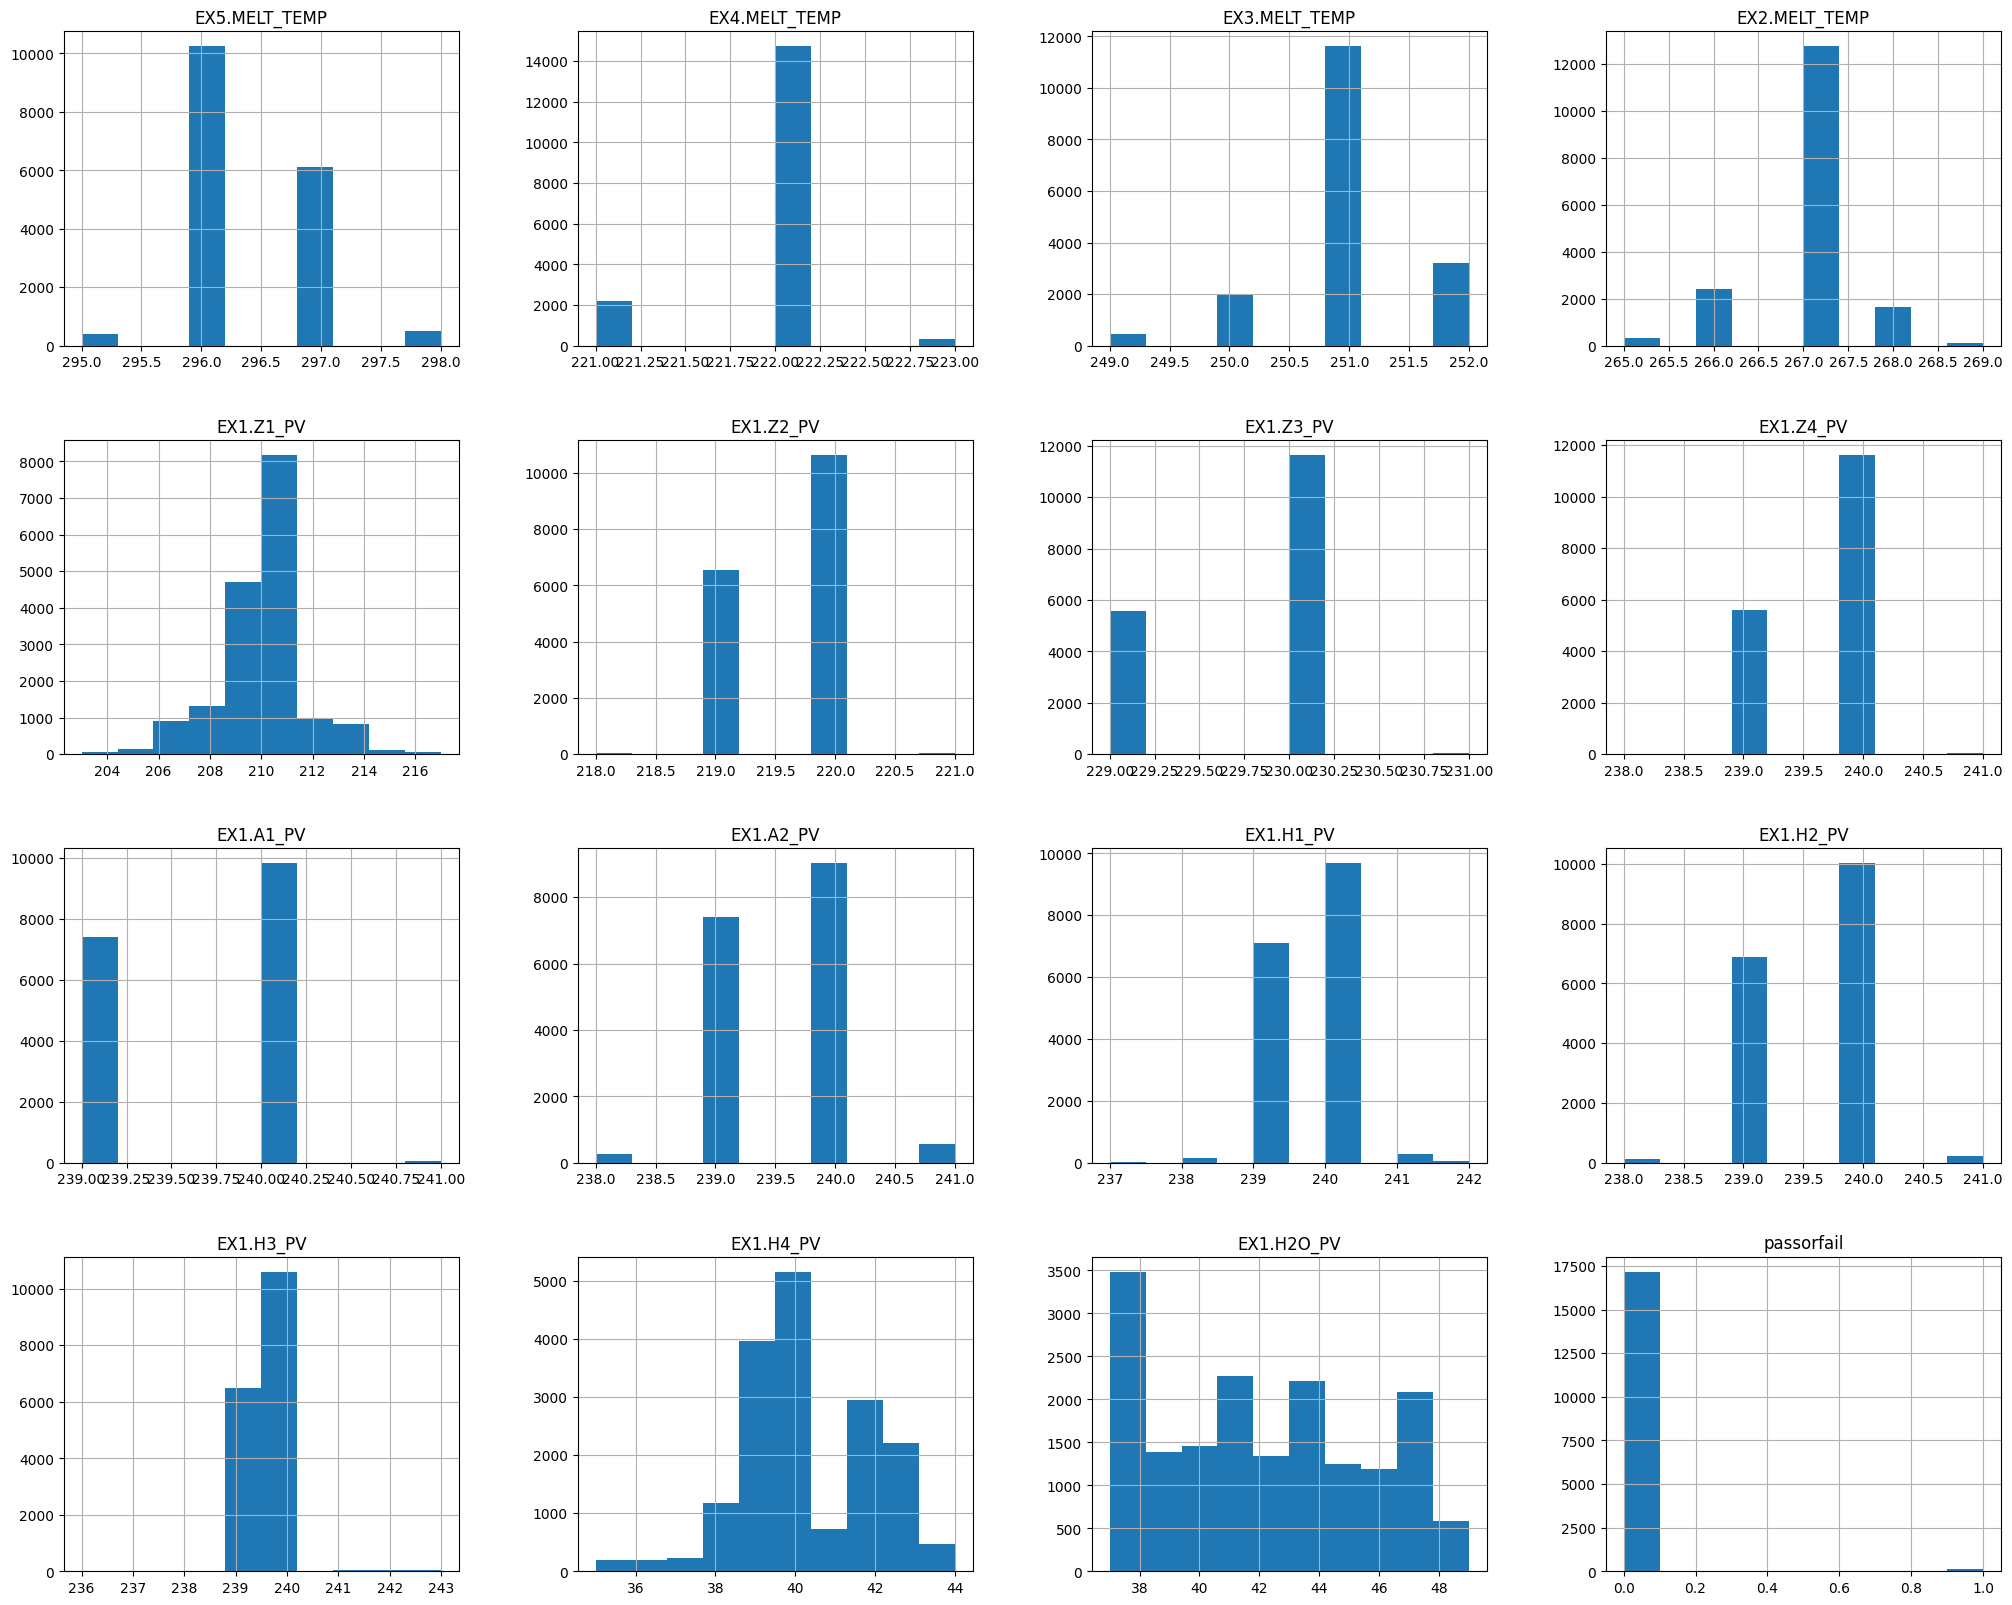

In [18]:
# 이상치 처리 후 변수 분포 시각화
df2.hist(figsize=(25,20))
plt.show()

In [19]:
# 4. t-test
t_test = []
for i, col in enumerate(df2.columns):
    t = stats.ttest_ind(df2[df2.passorfail==1][col], 
                        df2[df2.passorfail==0][col], 
                        equal_var=False)
    t_test.append([col, t[0], t[1]])

df_ttest = pd.DataFrame(t_test, columns=['col','tvalue', 'pvalue'])

t_list = []
for i in range(len(df_ttest)):
    if df_ttest['pvalue'][i] <= 0.1:
        t_list.append(df_ttest['col'][i])

df3 = df2.loc[:, t_list]
df3

,EX5.MELT_TEMP,EX4.MELT_TEMP,EX3.MELT_TEMP,EX2.MELT_TEMP,EX1.Z1_PV,EX1.Z2_PV,EX1.Z4_PV,EX1.A1_PV,EX1.A2_PV,EX1.H2_PV,EX1.H3_PV,EX1.H4_PV,EX1.H2O_PV,passorfail
0,297.0,222.0,251.0,267.0,209.0,219.0,239.0,240.0,239.0,240.0,240.0,40.0,41.0,0.0
1,297.0,222.0,251.0,268.0,210.0,219.0,239.0,240.0,239.0,240.0,240.0,40.0,41.0,0.0
2,297.0,222.0,251.0,267.0,210.0,219.0,239.0,240.0,239.0,240.0,240.0,40.0,41.0,0.0
3,297.0,222.0,251.0,267.0,210.0,219.0,240.0,240.0,239.0,240.0,240.0,40.0,41.0,0.0
4,297.0,222.0,251.0,267.0,210.0,219.0,239.0,240.0,239.0,240.0,240.0,40.0,41.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17259,296.0,222.0,252.0,267.0,211.0,219.0,240.0,240.0,240.0,239.0,240.0,40.0,42.0,0.0
17260,296.0,222.0,252.0,267.0,211.0,219.0,240.0,240.0,240.0,240.0,240.0,40.0,42.0,0.0
17261,296.0,222.0,252.0,267.0,212.0,219.0,240.0,240.0,240.0,239.0,240.0,40.0,42.0,0.0
17262,296.0,222.0,252.0,267.0,212.0,219.0,240.0,239.0,240.0,239.0,240.0,40.0,42.0,0.0


<Axes: >

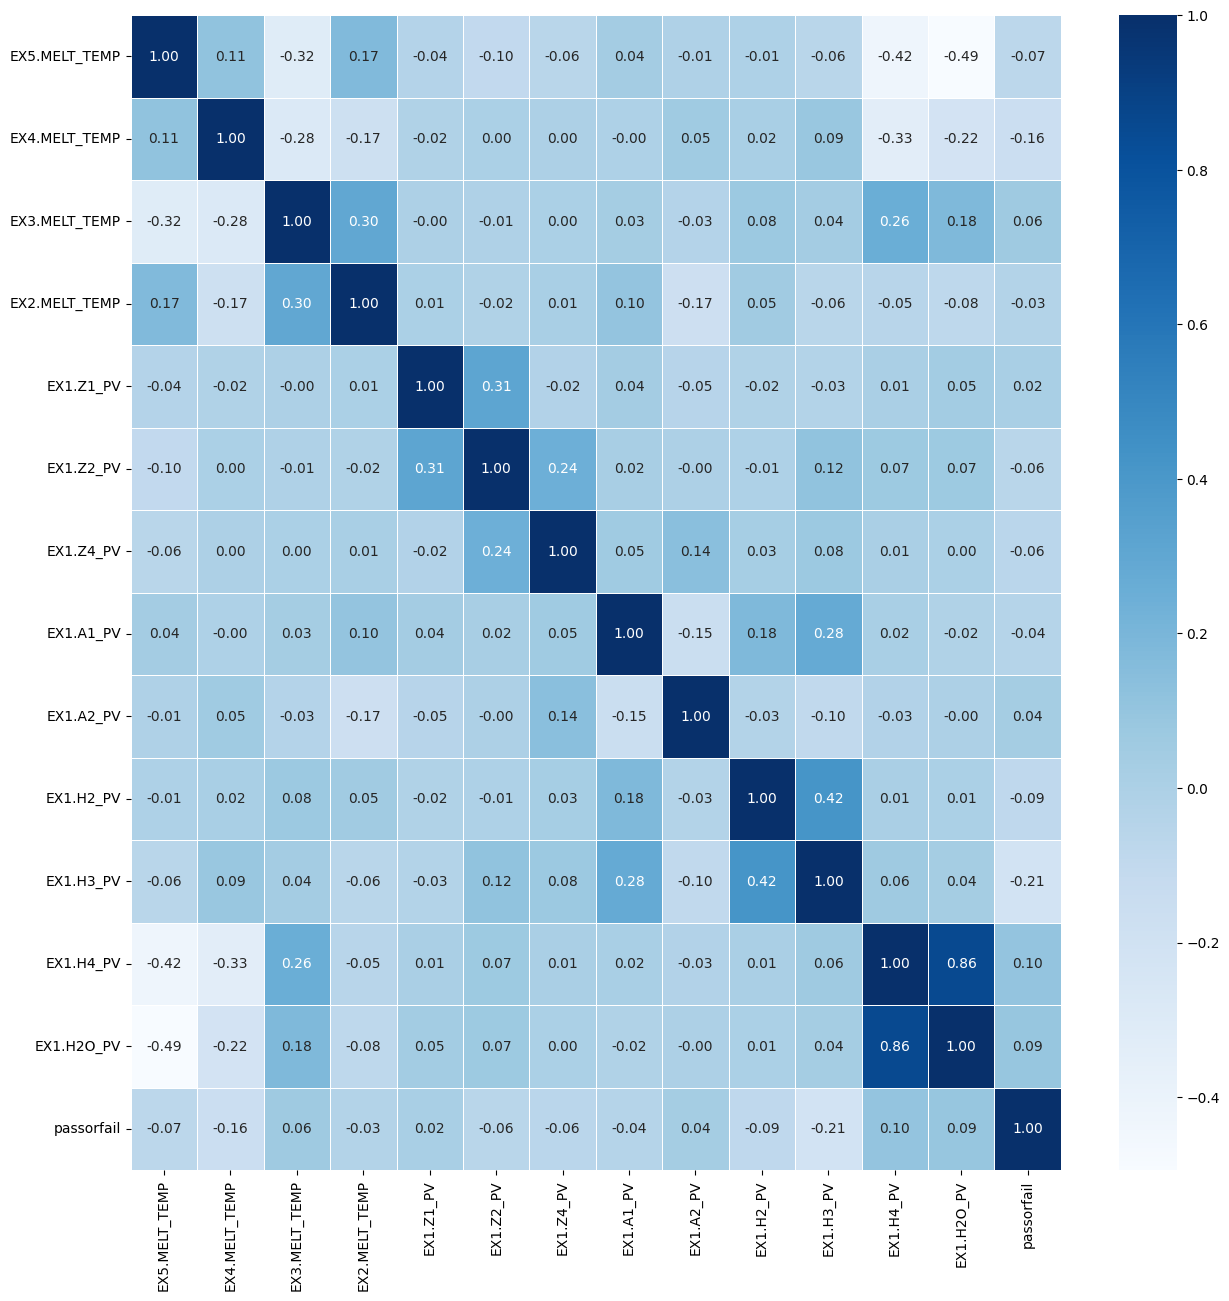

In [20]:
# 상관계수 시각화
plt.figure(figsize=(15,15))
sns.heatmap(data = df3.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')